# Bits

Un Bit es la unidad fundamental en la que podemos medir la información y nos permite decidir entre dos alternativas igualmente probables. La palabra Bit deriva de binary digit, o sea dígito binario, los cuales son representados por 1s y 0s. Pero si bien la palabra Bit deriva de binary digit no debemos confundirlos, ya que representan entidades distintas. Un Bit representa una cantidad de información definitiva. En cambio, un dígito binario es el valor de una variable binaria, el cual, como ya dijimos, puede ser 0 o 1; pero un dígito binario no representa información en sí misma.

Ahora bien, volviendo a las preguntas por sí o por no que mencionamos antes; responder cada una de estas preguntas requiere un Bit de información. Sólo necesitamos un Bit para responder una pregunta como ¿sos un hombre o una mujer?; el 0 puede significar hombre y el 1 mujer. Con simplemente transmitir ese dígito en el mensaje, estamos transmitiendo la respuesta. Pero aquí viene otra de las grandes intuiciones de Shannon; tampoco importa la forma que tome el mensaje, puede ser una luz roja versus una luz verde; o una bandera blanca y otra roja; realmente no importa el medio que se utilice, el mensaje siempre contiene un Bit de información.

Y ¿qué pasa con otro tipo de preguntas? preguntas como adivinar un número entero entre 1 y 1000, o como, ¿cuál es la capital de Islandia? Estas preguntas también pueden ser respondidas con una cadena de Bits. El lenguaje no es más que una cadena de símbolos y cualquier símbolo puede ser representado con una cadena de Bits. Por lo tanto, cualquier respuesta que pueda ser escrita en un lenguaje puede ser representada con una cadena de Bits, de 1s y 0s. Los Bits son el medio fundamental de la información.

https://relopezbriega.github.io/blog/2018/03/30/introduccion-a-la-teoria-de-la-informacion-con-python/


In [2]:
import random

random.seed(1982)

def adivinar_numero():
    mi_numero = random.randint(1, 1000)
    bits = 1
    tu_numero = int(input("Adivine un número entero entre 1 y 1000\nIngrese un número entre 1 y 1000: "))
    
    while tu_numero != mi_numero:
        if tu_numero < mi_numero:
            tu_numero = int(input("Su número es muy bajo!\nIngrese otro número entre 1 y 1000:"))
        else:
            tu_numero = int(input("Su número es muy alto!\nIngrese otro número entre 1 y 1000:"))
        bits += 1
    
    print("Felicidades el número es {0} y ha utilizado {1} bits!".format(mi_numero, bits))

Esta realización, que cualquier información, cualquier respuesta, puede ser codificada en una cadena de Bits, nos abre la puerta para pensar que entonces debe existir una forma de medir cuánta información hay en un mensaje.¿Cuál es la mínima cantidad de Bits para codificar un mensaje? Por ejemplo, para responder la pregunta planteada anteriormente de adivinar un número entero entre 1 y 1000, no se necesitan más que 10 Bits!. Shannon encontró que una pregunta con N posibles resultados puede ser respondida con una cadena de Bits de $log_2N$ Bits; es decir que solo necesitamos $log_2N$ Bits de información para distinguir entre N posibilidades. (Si les consume más de 10 bits llegar a la respuesta correcta, no están utilizando la estrategia correcta!).

In [3]:
adivinar_numero()

Adivine un número entero entre 1 y 1000
Ingrese un número entre 1 y 1000: 900
Su número es muy alto!
Ingrese otro número entre 1 y 1000:800
Su número es muy bajo!
Ingrese otro número entre 1 y 1000:810
Su número es muy bajo!
Ingrese otro número entre 1 y 1000:830
Su número es muy alto!
Ingrese otro número entre 1 y 1000:820
Su número es muy alto!
Ingrese otro número entre 1 y 1000:819
Su número es muy alto!
Ingrese otro número entre 1 y 1000:818
Su número es muy alto!
Ingrese otro número entre 1 y 1000:817
Su número es muy alto!
Ingrese otro número entre 1 y 1000:816
Su número es muy alto!
Ingrese otro número entre 1 y 1000:815
Su número es muy alto!
Ingrese otro número entre 1 y 1000:814
Su número es muy alto!
Ingrese otro número entre 1 y 1000:813
Su número es muy alto!
Ingrese otro número entre 1 y 1000:812
Felicidades el número es 812 y ha utilizado 13 bits!


In [4]:
def adivinar_nombre():
    nombres = [
    "ramses", "rodolfo", "regina", "ruth", "ramiro",
    "ramon", "roxana", "rebeca", "raquel", "ruben",
    "rosario", "renata", "raul", "romina", "roberto",
    "ricardo", "rafael", "rosa", "rodrigo", "rocio"
    ]
    index = random.randint(0, 19)
    mi_nombre = nombres[index]
    tu_nombre = input("Adivina el nombre! Empieza con R y tiene {} letras: ".format(len(mi_nombre)))
    letras = 2
    bits = 1
    
    while tu_nombre.lower() != mi_nombre:
        mi_nombre_parcial = mi_nombre[:letras]
        if mi_nombre_parcial == mi_nombre:
            break
        
        tu_nombre = input("Inténtalo otra vez! Empieza con {0} y tiene {1} letras:".format(mi_nombre_parcial,
                                                                                           letras))
        bits += 1
        letras += 1
    
    print("El nombre es {0} y has utilizado {1} bits! Los restantes {2} son redundantes!".format(mi_nombre.upper(),
                                                                                                bits, 
                                                                                                 len(mi_nombre) - bits))

# Entropía

La idea central de la Teoría de la información de Shannon es la Entropía. La información y la Entropía están intimimamente relacionadas, ya que esta última es en sí misma una medida de información.

La fórmula matemática que encontró Shannon para medir la Entropía de un mensaje es muy similar a la que se utiliza en Termodinámica para medir el grado de desorden de un sistema. Es la siguiente:

$H(x)=−\sum_xp(X=x)log_2(p(X=x))$

Cuando Shannon se dio cuenta de que la Entropía de una secuencia de símbolos estaba relacionada con la cantidad de información que la cadena de símbolos tiende a contener, de repente tuvo una herramienta para cuantificar la información y la redundancia en un mensaje. Fue capaz de demostrar, matemáticamente, cuánta información puede transmitirse en cualquier medio y que existe un límite fundamental para la cantidad de información que puede transmitir con un equipo determinado.

Veamos algunos ejemplos de como calcular la Entropía con la ayuda de Python:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

# ingnorar mensajes de advertencias en el notebook
warnings.filterwarnings('ignore')

# graficos en el notebook
%matplotlib inline


def entropia(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    # X debe ser de tipo np.array
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs), 3)

def entropia_prob_pq(x):
    """Devuelve la entropia de una probabilidad de dos posibilidades"""
    return round((-x * np.log2(x)) + (-(1 - x) * np.log2((1 - x))), 3)


def entropia_posibilidades(x):
    """Devuelve la entropía para la cantidad de posibilidades independientes x"""
    return round(np.log2(x), 3)

def entropia_geometrica(x):
    """Devuelve la entropia para una variable aleatoria Geometrica"""
    return round(-(1/x - 1)*np.log2(1-x) - np.log2(x))

Supongamos que arrojamos una moneda al aire 16 veces y representamos a la cara con un 1 y a el sello con un 0. Podemos obtener una cadena como la siguiente: 1101001110001011. Esta cadena es aleatoria y por lo tanto no podemos encontrar ningún patrón en ella que nos diga cuál va a ser el próximo valor que podemos obtener más alla de la chance de 50% habitual, por tal motivo, no podemos comprimir la cadena y cada símbolo contiene un Bit de información. Ahora supongamos que la moneda esta sesgada y que siempre sale cara; en este caso nuestra cadena será la siguiente: 1111111111111111. Esta cadena es sumamente predecible, no nos aporta ninguna sorpresa y tenemos una probabilidad de 100% de adivinar que el siguiente dígito también será un 1. Es totalmente redundante y por lo tanto no nos aporta ninguna información. Cada símbolo contiene un Bit de información. Sin sorpresa, no hay información.

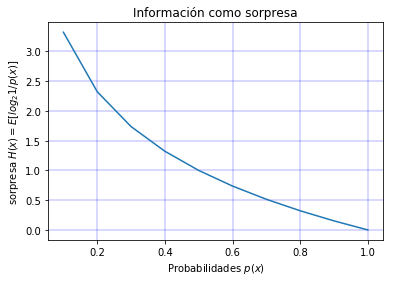

In [6]:
# Graficando la información como sorpresa
# Mientras menos probable, más sorpresa y más información contiene.
vent = np.vectorize(entropia_posibilidades)

X = np.linspace(0, 1, 11)

plt.plot(X, vent(X)*-1)
plt.title("Información como sorpresa")
plt.grid(color='b', linestyle='-', linewidth=.3)
plt.xlabel(r'Probabilidades $p(x)$')
plt.ylabel(r'sorpresa $H(x) = E[log_2 1/p(x)]$')
plt.show()

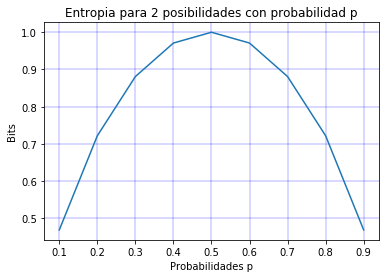

In [7]:
# Graficando la entropia en el caso de 2 posibilidades con
# probabilidad p y (1- p)

# vectorizar la función para poder pasarle un vector de parámetro
vent = np.vectorize(entropia_prob_pq)

X = np.linspace(0, 1, 11)

plt.plot(X, vent(X))
plt.title("Entropia para 2 posibilidades con probabilidad p")
plt.grid(color='b', linestyle='-', linewidth=.3)
plt.xlabel('Probabilidades p')
plt.ylabel('Bits')
plt.show()


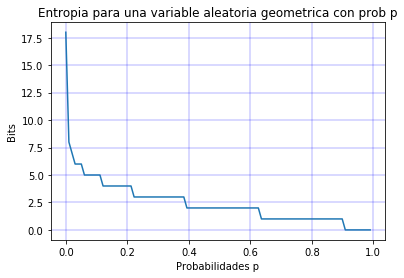

In [8]:
# Graficando la entropia de una variable aleatoria geometrica
# probabilidad p 

# vectorizar la función para poder pasarle un vector de parámetro
vent = np.vectorize(entropia_geometrica)

X = np.linspace(0.00001, 1, 100)

plt.plot(X, vent(X))
plt.title("Entropia para una variable aleatoria geometrica con prob p")
plt.grid(color='b', linestyle='-', linewidth=.3)
plt.xlabel('Probabilidades p')
plt.ylabel('Bits')
plt.show()

In [9]:
# La entropia de una muestra de 2 posibilidades completamente
# aleatorias, en la que cualquiera de los 2 valores tiene la 
# misma probabilidad (p=0.5) de ser seleccionada es de 1 bit

# Muestra de 10000 valores aleatorios entre 0 y 1
X = np.random.randint(0, 2, size=10000)

entropia(X), entropia_posibilidades(2)

(1.0, 1.0)

In [10]:
# La entropia de una muestra de 8 posibilidades completamente
# aleatorias es igual a 3 bits.

# Muestra de 10000 valores aleatorios entre 0 y 7
X = np.random.randint(0, 8, size=10000)

entropia(X), entropia_posibilidades(8)

(3.0, 3.0)

# Comprimiendo datos

by Pablo Estrada

Hoy vamos a platicar sobre cómo hacer un pequeño programa para comprimir datos de un archivo de texto. Nuestro programa va a funcional con un algoritmo de compresión bastante famoso: El algoritmo de Huffman. Con él vamos a utilizar menos bits para guardar la misma cantidad de información.

Nota: En este post estudiamos codificación con el algoritmo de Huffman. En un post posterior estudiamos decodificación. Chécalo!

La idea es muy simple: En un archivo normal, todos los símbolos son de un byte (8 bits). En nuestro archivo comprimido, los símbolos que se utilizan mucho pueden ser codificados con menos bits, y los símbolos que casi no se usan pueden ser codificados con más bits, y así, el promedio de bits por símbolo sería menor a 8.

1. http://bitybyte.github.io/Huffman-coding/
2. https://gist.github.com/pabloem/7974e7a1dc755190b7f1

# El algoritmo

El algoritmo de Huffman recibe una distribución de probabilidad de los símbolos del archivo. Basado en esta distribución, se crea un árbol binario de codificación utilizando una fila de prioridad, y con ese árbol de codificación se genera un diccionario. Luego ese diccionario es utilizado para codificar el archivo. Vamos a ver por partes:

## Obteniendo la distribución

La distribución de entrada define las probabilidades de que cada símbolo aparezca en el archivo, por ejemplo, un archivo con 50% de la letra ‘a’, 30% de ‘b’ y 20% de ‘c’ tiene la siguiente distribución: P(a)=0.5, P(b)=0.3, P(c)=0.2.

Para calcular la distribución de un archivo utilizamos la siguiente función:

In [11]:
import collections
def get_probabilities(content):
    total = len(content) + 1 # Agregamos uno por el caracter FINAL
    c = collections.Counter(content)
    # out: Counter({'key1': n1, 'key2': n2, 'key3': n3, ...})
    res = {}
    for char,count in c.items():
        res[char] = float(count)/total
    res['end'] = 1.0/total
    return res

In [12]:
#Entonces, un ejemplo del resultado nuestra función sería:
    
get_probabilities("aaaabbbcc")

{'a': 0.4, 'b': 0.3, 'c': 0.2, 'end': 0.1}

# Obteniendo el árbol de codificación

El siguiente paso es obtener el árbol de codificación. Éste es el paso de la muerte del algoritmo de Huffman, y consiste en los siguientes pasos:

1. Poner todos los símbolos en una fila de prioridad de acuerdo a sus probabilidades.
2. Combinar los dos símbolos menos probables en un solo nodo de un árbol.
3. Insertar el nuevo nodo a la fila de prioridad
4. Repetir desde el paso 2 hasta que sólo haya un elemento en la fila de prioridad.

Para nuestra fila de prioridad vamos a utilizar un módulo de Python llamado heapq, que provee una fila de prioridad basada en Heaps.

In [13]:
import heapq
# https://www.techbeamers.com/python-heapq/

def make_tree(probs):
    q = []
    # Agregamos todos los símbolos a la pila
    for ch,pr in probs.items():
        # La fila de prioridad está ordenada por
        # prioridad y profundidad
        heapq.heappush(q,(pr,0,ch))
    
    # lista de prioridad
    for ele in q:
        print(ele)
    
    # Empezamos a mezclar símbolos juntos
    # hasta que la fila tenga un elemento
    while len(q) > 1:
        e1 = heapq.heappop(q) # El símbolo menos probable
        e2 = heapq.heappop(q) # El segundo menos probable
        
        # Este nuevo nodo tiene probabilidad e1[0]+e2[0]
        # y profundidad mayor al nuevo nodo
        nw_e = (round(e1[0]+e2[0],2),max(e1[1],e2[1])+1,[e1,e2])
        heapq.heappush(q,nw_e)
        
        print("\n")
        for ele in q:
            print(ele)
        
    print("Solucion final\n")    
    return q[0] # Devolvemos el arbol sin la fila

In [14]:
tree = make_tree(get_probabilities("aaaabbbcc"))
print(tree)

(0.1, 0, 'end')
(0.2, 0, 'c')
(0.3, 0, 'b')
(0.4, 0, 'a')


(0.3, 0, 'b')
(0.4, 0, 'a')
(0.3, 1, [(0.1, 0, 'end'), (0.2, 0, 'c')])


(0.4, 0, 'a')
(0.6, 2, [(0.3, 0, 'b'), (0.3, 1, [(0.1, 0, 'end'), (0.2, 0, 'c')])])


(1.0, 3, [(0.4, 0, 'a'), (0.6, 2, [(0.3, 0, 'b'), (0.3, 1, [(0.1, 0, 'end'), (0.2, 0, 'c')])])])
Solucion final

(1.0, 3, [(0.4, 0, 'a'), (0.6, 2, [(0.3, 0, 'b'), (0.3, 1, [(0.1, 0, 'end'), (0.2, 0, 'c')])])])


# Creando el diccionario de codificación

Una vez que tenemos un árbol de codificación, tenemos que usarlo para generar un diccionario de codificación. Para esto tenemos que generar códigos binarios para cada uno de los símbolos del archivo de entrada. ¿Cómo generamos los códigos binarios utilizando el árbol del algoritmo?

Exactamente. Marcamos cada rama del árbol con 1 o 0! Y entonces el código de cada símbolo será la serie de 1s y 0s que hay que atravesar para alcanzarlo.

![huffcodemk.png](huffcodemk.png)

Para conseguir esto, vamos a hacer DFS (Depth-First Search) sobre el árbol, generando los códigos conforme ‘bajamos’ por las ramas.

In [15]:
#!/usr/bin/env python3
import sys
import pickle
import json
    
def make_dictionary(tree):
    res = {} # La estructura que vamos a devolver
    search_stack = [] # Pila para DFS
    # El último elemento de la lista es el prefijo!
    search_stack.append(tree+("",)) 
    while len(search_stack) > 0:
        # remuevo y devuelvo el ultimo elemento de la lista
        elm = search_stack.pop()
        if type(elm[2]) == list:
            print(type(elm[2]))
            prefix = elm[-1]
            print(prefix)
            # En este caso, el nodo NO es una hoja del árbol,
            # es decir que tiene nodos hijos
            
            # El hijo derecho tiene "1" en el prefijo
            search_stack.append(elm[2][1]+(prefix+"1",))
            # El hijo izquierdo tiene "0" en el prefijo
            search_stack.append(elm[2][0]+(prefix+"0",))
            continue
        else:
            # El nodo es una hoja del árbol, así que
            # obtenemos el código completo y lo agregamos
            code = elm[-1]
            res[elm[2]] = code
        pass
    return res

In [16]:
make_dictionary(tree)

<class 'list'>

<class 'list'>
1
<class 'list'>
11


{'a': '0', 'b': '10', 'end': '110', 'c': '111'}

Con la rutina make_dictionary obtenemos el diccionario de codificación, y tenemos todo lo necesario para codificar nuestro archivo a su versión comprimida:

Codificando el texto
Ya que tenemos el diccionario, codificar el texto es la parte más fácil. Simplemente tenemos que concatenar todos los bits de cada uno de los símbolos. Esto nos va a generar una cadena bien larga.

Por ejemplo, dado el diccionario en la Figura 4, y la cadena de entrada "aaaabbbcc", el resultado sería "0 0 0 0 10 10 10 111 111 110" (como ven a:0, b:10, c:111, Fin:110). Ya todo junto sería: "0000101010111111110".

Pero no queremos una variable de tipo String. Queremos una cadena de bits. Así que tenemos que convertirlo a entero. Esto nos hace descubrir un problema. Los ceros a la izquierda!

0000101010111111110 = 101010111111110

Para arreglar este problema, vamos a agregar un 1 a la izquierda, para mantener la cuenta de ceros. Es decir que nuestra cadena "aaaabbbcc" va a quedar codificada así: "10000101010111111110". Con el 1 a la izquierda podemos convertirla a entero y no perder los ceros! : )

Afortunadamente, en Python las variables enteras no tienen un límite para su longitud (Hurra por los lenguajes de alto nivel!). La función se ve así:

In [17]:
def compress(dic,content):
    res = ""
    # Iteramos sobre cada elemento del archivo de entrada
    for ch in content:
        code = dic[ch]
        res = res + code
    # Agregamos el 1 a la izquierda, y el marcador de final
    # a la derecha
    res = '1' + res + dic['end']
    # Agregamos ceros para que la longitud del resultado
    # sea un múltiplo de 8
    res = res + (len(res) % 8 * "0")
    return int(res,2) # Convertimos a entero! (2 porque es base 2)

Y con esto tenemos todo listo! Ahora sólo es necesario guardar la cadena de bits en forma de int que viene de compress, y el diccionario; y tenemos todo lo necesario para decodificar el archivo!


# Guardando a disco

Para guardar a disco, vamos a hacerlo muy simple. El diccionario vamos a guardarlo como está en JSON, y para la cadena de bits vamos a utilizar una librería estándar de Python llamada pickle, que está diseñada para salida y entrada binarias. La función es simple:

In [18]:
def store(data,dic,outfile):
    # Guardamos la cadena de bits en un archivo, que abrimos
    # en modo binario (por eso 'wb')
    outf = open(outfile,'wb')
    pickle.dump(compressed,outf)
    outf.close()

    # Guardamos el diccionario en otro archivo en formato JSON
    outf = open(outfile+".dic",'w')
    json.dump(dic,outf)
    outf.close()
    pass

In [21]:
#Poniéndolo todo junto
#Pues ya que tenemos todas las partes del algoritmo, podemos ponerlas juntas:

# Leemos el archivo de entrada completo a cont
#inf = open(sys.argv[1])
#cont = inf.read()
#inf.close()
# Calculamos la distribución de probabilidad para cada símbolo

cont = "aaaabbbcc"
probs = get_probabilities(cont)
# Construimos el árbol de parseo! : )
tree = make_tree(probs)
# Construimos el diccionario para codificar
dic = make_dictionary(tree)
# Codificamos el contenido del archivo
compressed = compress(dic,cont)
# Guardamos todo en disco!
#store(compressed,dic,sys.argv[2])

print("Archivo comprimido!")

(0.1, 0, 'end')
(0.2, 0, 'c')
(0.3, 0, 'b')
(0.4, 0, 'a')


(0.3, 0, 'b')
(0.4, 0, 'a')
(0.3, 1, [(0.1, 0, 'end'), (0.2, 0, 'c')])


(0.4, 0, 'a')
(0.6, 2, [(0.3, 0, 'b'), (0.3, 1, [(0.1, 0, 'end'), (0.2, 0, 'c')])])


(1.0, 3, [(0.4, 0, 'a'), (0.6, 2, [(0.3, 0, 'b'), (0.3, 1, [(0.1, 0, 'end'), (0.2, 0, 'c')])])])
Solucion final

<class 'list'>

<class 'list'>
1
<class 'list'>
11
Archivo comprimido!


Y listo, con esto tenemos el programa completo para comprimir archivos. Fíjense que si la cadena "aaaabbbcc", que es de 9 bytes (72 bits) queda codificada como "10000101010111111110" (20 bits), entonces estamos comprimiendo más del 70%!

In [22]:
probs

{'a': 0.4, 'b': 0.3, 'c': 0.2, 'end': 0.1}

In [23]:
tree

(1.0,
 3,
 [(0.4, 0, 'a'),
  (0.6, 2, [(0.3, 0, 'b'), (0.3, 1, [(0.1, 0, 'end'), (0.2, 0, 'c')])])])

In [24]:
dic

{'a': '0', 'b': '10', 'end': '110', 'c': '111'}

In [25]:
compressed

8740832

In [26]:
bin(compressed)[2:]

'100001010101111111100000'

In [46]:
## ejemplo con una moneda: 16 veces, p=0.5

p = 0.5
N = 16
X = np.random.binomial(size=N, n=1, p=p)

# si cae 0 es cara y si cae 1 es sello.
Y = ""

for i in range(len(X)):
    if X[i] == 0:
        Y = Y + "c"
    else:
        Y = Y + "s"


In [47]:
probs = get_probabilities(Y)
# Construimos el árbol de parseo! : )
tree = make_tree(probs)
# Construimos el diccionario para codificar
dic = make_dictionary(tree)
print(dic)

(0.058823529411764705, 0, 'end')
(0.47058823529411764, 0, 's')
(0.47058823529411764, 0, 'c')


(0.47058823529411764, 0, 's')
(0.53, 1, [(0.058823529411764705, 0, 'end'), (0.47058823529411764, 0, 'c')])


(1.0, 2, [(0.47058823529411764, 0, 's'), (0.53, 1, [(0.058823529411764705, 0, 'end'), (0.47058823529411764, 0, 'c')])])
Solucion final

<class 'list'>

<class 'list'>
1
{'s': '0', 'end': '10', 'c': '11'}


In [48]:
entropia(X), entropia_prob_pq(p), entropia_posibilidades(len(set(X)))

(1.0, 1.0, 1.0)

In [49]:
N*entropia(X) # es igual al numero de datos que genere, no puedo comprimir la informacion

16.0

In [77]:
## ejemplo con una moneda: 5000 veces, p=3/4

p = 3/4
N = 5000
X = np.random.binomial(size=N, n=1, p=p)

# si cae 0 es cara y si cae 1 es sello.
Y = ""

for i in range(len(X)):
    if X[i] == 0:
        Y = Y + "c"
    else:
        Y = Y + "s"

In [78]:
probs = get_probabilities(Y)
# Construimos el árbol de parseo! : )
tree = make_tree(probs)
# Construimos el diccionario para codificar
dic = make_dictionary(tree)
print(dic)

(0.0001999600079984003, 0, 'end')
(0.7558488302339532, 0, 's')
(0.2439512097580484, 0, 'c')


(0.24, 1, [(0.0001999600079984003, 0, 'end'), (0.2439512097580484, 0, 'c')])
(0.7558488302339532, 0, 's')


(1.0, 2, [(0.24, 1, [(0.0001999600079984003, 0, 'end'), (0.2439512097580484, 0, 'c')]), (0.7558488302339532, 0, 's')])
Solucion final

<class 'list'>

<class 'list'>
0
{'end': '00', 'c': '01', 's': '1'}


In [79]:
entropia(X), entropia_prob_pq(p) # ya no uso entropia posibilidades porque no es uniformemente distribuido.

(0.802, 0.811)

In [80]:
bits = N*entropia_prob_pq(p) # puedo comprimir la infomacion, si nos fijamos en el dic, s es mas probable por lo tanto trato de usar menos bit
                             # y como c es menos probable trato de usar mas bit.

In [81]:
bits

4055.0000000000005

In [82]:
(N-bits)/N*100 # estamos comprimiento la informacion en %

18.89999999999999

In [85]:
compressed = compress(dic,Y)

In [86]:
compressed

2598317181717325699087572847660787510133776585154213476991921250923015185672255163127240251657917854893297818136165568756200870469468966366253237820331144635222203509415744383275524536256598382059548845699015429830701322728192755340169932206991496743290749871841716822340747002167374405862798960135177678793327979031642345435989318552061578766962113551713304321989262812267081637185563045862244755263182322260789122934818466123293221761360634277214359406189844544460595401454370830739437143147347098056116916658032938843780720625145208936420686565069657448246394212081396674613746351219422808640442945434727349061484883959185233861620551406552496914440335743210661593589687654669793212670115089883565395611165268783233793880543855856958891902255880838587301335797615340354965712216886619669898886645635847674112741646779187702519089735634511577179226906753884358669735199869011039892716572503664132136009903422513784750397713725018709180220859813507264396372856978945229128279343031050728944257570298

In [90]:
len([int(x) for x in str(compressed)])

1876

In [91]:
len(Y)

5000